<a href="https://colab.research.google.com/github/gustavochavesferreira/tp1_algoritmos2/blob/main/radix_tree_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install graphviz
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [85]:
from graphviz import Digraph

class CompactTrieNode:
  def __init__(self, binary_string: str = "", is_leaf: bool = False) -> None:
    self.children = [None, None]
    self.is_leaf = is_leaf
    self.binary_string = binary_string
    self.unique_id = id(self)  # Unique ID for visualization purposes

class CompactTrie:
  def __init__(self) -> None:
    self.root = None

  def get_common_prefix_length(self, key1: str, key2: str) -> int:
    i = 0
    while i < min(len(key1), len(key2)) and key1[i] == key2[i]:
        i += 1
    return i

  def search(self, key: str) -> CompactTrieNode:
        # Start at the root node
        current_node = self.root

        # Traverse the trie
        while current_node:
            # Compare the prefix of the key with the node's binary_string
            common_prefix_length = self.get_common_prefix_length(current_node.binary_string, key)

            # If the current node matches the prefix of the key
            if common_prefix_length == len(current_node.binary_string):
                key = key[common_prefix_length:]  # Shorten the key by the matched part

                # If the remaining key is empty and the current node is a leaf, we found the key
                if not key:
                  if current_node.is_leaf:
                    return current_node
                  else:
                    return None

                current_node = current_node.children[int(key[0])]  # Move to the child node based on the first char of the key

            else:
                return None  # No match for the current node's prefix

        return None  # If we reach here, the key is not found

  def insert(self, key: str) -> None:
    # Caso em que a árvore está vazia
    if(self.root == None):
      self.root = CompactTrieNode(key, True)
      return

    # Caso em que a árvore já possuia pelo menos um elemento
    else:

      # Olhando para a raiz
      common_prefix_length = self.get_common_prefix_length(self.root.binary_string, key)

      if(key == self.root.binary_string):
        self.root.is_leaf = True
        return

      elif(common_prefix_length < len(self.root.binary_string)):
        old_node = self.root
        new_node = CompactTrieNode(key[common_prefix_length:], True)
        self.root = CompactTrieNode(key[:common_prefix_length], False)
        self.root.children[int(old_node.binary_string[0])] = old_node
        self.root.children[int(new_node.binary_string[0])] = new_node
        return

      elif(True):
        if(len(key[common_prefix_length:]) == 0):
          common_prefix_node = CompactTrieNode(self.root.binary_string[:common_prefix_length], True)

          if(self.root.is_leaf == True):
            old_suffix_node = CompactTrieNode(self.root.binary_string[common_prefix_length:], True)
          else:
            old_suffix_node = CompactTrieNode(self.root.binary_string[common_prefix_length:])

          old_suffix_node.children[0] = self.root.children[0]
          old_suffix_node.children[1] = self.root.children[1]

          common_prefix_node.children[int(old_suffix_node.binary_string[0])] = old_suffix_node
          self.root = common_prefix_node

          return

        else:
          common_prefix_node = CompactTrieNode(self.root.binary_string[:common_prefix_length])

          if(self.root.is_leaf == True):
            old_suffix_node = CompactTrieNode(self.root.binary_string[common_prefix_length:], True)
          else:
            old_suffix_node = CompactTrieNode(self.root.binary_string[common_prefix_length:])

          key_suffix_node = CompactTrieNode(key[common_prefix_length:], True)

          old_suffix_node.children[0] = self.root.children[0]
          old_suffix_node.children[1] = self.root.children[1]

          common_prefix_node.children[int(old_suffix_node.binary_string[0])] = old_suffix_node # Tratar caso em que a string pode ter acabado
          common_prefix_node.children[int(key_suffix_node.binary_string[0])] = key_suffix_node
          self.root = common_prefix_node

          return

      else:
        current_node = self.root
        last_node = None

        while((current_node != None) and (current_node.binary_string == key[:len(current_node.binary_string)])):
          key = key[len(current_node.binary_string):]

          if((len(key)) == 0 and (current_node.is_leaf == False)):
            current_node.is_leaf = True
            return

          last_node = current_node
          current_node = current_node.children[int(key[0])]

        if(current_node == None):
          new_node = CompactTrieNode(key, True)
          last_node.children[int(key[0])] = new_node
          return

        common_prefix_length = self.get_common_prefix_length(current_node.binary_string, key)

        common_prefix_node = CompactTrieNode(current_node.binary_string[:common_prefix_length])
        if(self.root.is_leaf == True):
          old_suffix_node = CompactTrieNode(self.root.binary_string[common_prefix_length:], True)
        else:
          old_suffix_node = CompactTrieNode(self.root.binary_string[common_prefix_length:])
        key_suffix_node = CompactTrieNode(key[common_prefix_length:], True)

        last_node.children[int(key[0])] = common_prefix_node
        common_prefix_node.children[int(old_suffix_node.binary_string[0])] = old_suffix_node # Tratar caso em que a string pode ter acabado
        common_prefix_node.children[int(key_suffix_node.binary_string[0])] = key_suffix_node

        old_suffix_node.children[0] = current_node.children[0]
        old_suffix_node.children[1] = current_node.children[1]

  def visualize(self, filename="compact_trie"):
      dot = Digraph(comment="Compact Trie")

      def add_nodes_edges(node, parent_label=None):
          if node is None:
              return
          node_label = f"{node.binary_string}_{node.unique_id}"
          dot.node(node_label, node.binary_string, shape='circle', color='black', fontcolor='red' if node.is_leaf else 'blue')
          if parent_label:
              dot.edge(parent_label, node_label)
          if node.children[0] is not None:
              add_nodes_edges(node.children[0], node_label)
          if node.children[1] is not None:
              add_nodes_edges(node.children[1], node_label)

      if self.root is not None:
          add_nodes_edges(self.root)

      dot.render(filename, format="png", cleanup=True)
      print(f"Compact trie saved as {filename}.png")

  def print_trie(self, node=None, level=0) -> None:
        # Start with the root if no node is provided
        if node is None:
            node = self.root
        if node is None:
            print("The trie is empty.")
            return

        # Print the current node's information
        indent = "  " * level
        print(f"{indent}Node - Binary String: '{node.binary_string}', Is Leaf: {node.is_leaf}")

        # Print children nodes recursively
        for i, child in enumerate(node.children):
            if child is not None:
                print(f"{indent}  Child {i}:")
                self.print_trie(child, level + 2)

Insira uma nova string (ou 'sair' para sair): 111
interactive_trie.png has been deleted.
Compact trie saved as interactive_trie.png


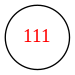

Insira uma nova string (ou 'sair' para sair): 100
interactive_trie.png has been deleted.
Compact trie saved as interactive_trie.png


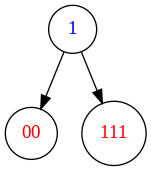

Insira uma nova string (ou 'sair' para sair): sair
Finalizando o programa.


In [87]:
import os
from IPython.display import Image

trie = CompactTrie()

from IPython.display import Image, display, clear_output
import time

# Instantiate the trie
trie = CompactTrie()

# Start an interactive loop to add nodes and display the updated trie
while True:
    # Prompt user to input a new binary string to insert
    new_node_string = input("Insira uma nova string (ou 'sair' para sair): ")

    if new_node_string.lower() == 'sair':
        print("Finalizando o programa.")
        break

    # Insert the new string into the trie
    trie.insert(new_node_string)

    file_path = "interactive_trie.png"

    # Check if file exists before attempting to delete
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"{file_path} has been deleted.")
    else:
        print(f"{file_path} does not exist.")

    # Visualize the updated trie
    trie.visualize("interactive_trie")

     # Display the updated image
    display(Image(filename="interactive_trie.png"))

In [78]:
t = CompactTrie()
t.insert("000")
t.insert("111")

s = t.search("011")

if(s != None):
  print("Encontrado")
else:
  print("Não encontrado")

Não encontrado
